In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [2]:
m = 10
M = m*np.eye(2)
C = 0
d = 0
R = np.zeros((2, 2))

V_init = np.matrix([[0.1], [0.1]])

N = 100

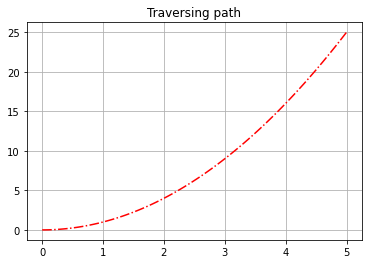

In [3]:
# PATH gen
x = np.linspace(0, 5, N).reshape(-1, 1)
q = np.hstack((x, np.power(x, 2))).T

plt.figure()
plt.plot(q[0, :], q[1, :], "r-.")
plt.grid()
plt.title("Traversing path")
plt.show()

In [31]:
def R(s):
    n = s.shape[1]
    r = np.zeros((n, 2, 2))
    phi = np.arctan(s[1, :]/s[0, :])
    for i in range(n):
        r[i, :, :] = np.matrix([[np.cos(phi[i]), -1*np.sin(phi[i])], [np.sin(phi[i]), np.cos(phi[i])]])
    return r

In [5]:
thetha = np.linspace(0, 1, N).reshape(1, -1)
dthetha = thetha[0, 1] - thetha[0, 0]

In [6]:
def get_bar(thetha, N):
    thetha_bar = []
    for i in range(1, N):
        thetha_bar.append((thetha[:, i] + thetha[:, i-1])/2)
    thetha_bar = np.array(thetha_bar).reshape(1, -1)
    return thetha_bar

In [7]:
thetha_bar = get_bar(thetha, N)

In [50]:
u = cp.Variable((2, N))
b = cp.Variable((1, N))

In [9]:
b_bar = get_bar(b, N)

In [10]:
a = (cp.diff(b.T, k=1)/(2*dthetha)).T

In [51]:
a.shape

(1, 99)

In [11]:
s_bar_1 = (cp.diff(q.T, k=1)/dthetha).T

In [12]:
s_bar_1.shape

(2, 99)

In [13]:
s_bar_2 = (cp.diff(q.T, k=2)/dthetha).T

In [14]:
s_bar_2.shape

(2, 98)

In [18]:
cost = 0
for i in range(1, N):
    cost += 2*dthetha/(cp.sqrt(b[0, i]) + cp.sqrt(b[0, i-1]))

In [23]:
Objective = cp.Minimize(cost)

In [64]:
Objective = cp.Minimize(0)

In [65]:
R_tilde = R(s_bar_1.value)

In [66]:
R_tilde.shape

(99, 2, 2)

In [67]:
m_tilde = M@s_bar_1
c_tilde = M@cp.hstack((s_bar_2, cp.reshape(s_bar_2[:, -1], (2, 1)))) + C*cp.power(s_bar_1, 2)
d_tilde = d

In [68]:
s_1 = cp.diff(q, axis=1)

In [69]:
Constraints = []
for i in range(1, N-1):
    Constraints.append(R_tilde[i]@cp.reshape(u[:, i], (2, 1)) == m_tilde*a[:, i] + c_tilde*0.5*(b[:, i-1] + b[:, i]) + d_tilde)
Constraints.append(b[:, 0] == cp.power(np.linalg.norm(V_init)*dthetha/np.linalg.norm(q[1] - q[0]), 2))

In [70]:
problem = cp.Problem(objective=Objective, constraints=Constraints)

In [71]:
problem.solve(verbose=True)

                                     CVXPY                                     
                                     v1.2.0                                    
(CVXPY) Apr 17 12:44:16 PM: Your problem has 400 variables, 99 constraints, and 0 parameters.
(CVXPY) Apr 17 12:44:16 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Apr 17 12:44:16 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Apr 17 12:44:16 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Apr 17 12:44:16 PM: Compiling problem (target solver=ECOS).
(CVXPY) Apr 17 12:44:16 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing 

0.0